<a href="https://colab.research.google.com/github/adityaiitg/Learning-NLP/blob/main/intro_to_gmm_%26_em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models

## Definitions
A Gaussian Mixture is a function that is comprised of several Gaussians, each identified by k ∈ {1,…, K}, where K is the number of clusters of our dataset. Each Gaussian k in the mixture is comprised of the following parameters:

* A mean μ that defines its centre.
* A covariance Σ that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario.
* A mixing probability π that defines how big or small the Gaussian function will be.

![Image](https://miro.medium.com/max/1400/1*lTv7e4Cdlp738X_WFZyZHA.png)

## First -- What is a Gaussian?

## A Distribution is a listing of outcomes of an experiment and the probability associated with each outcome


![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/450px-Empirical_Rule.PNG "Logo Title Text 1")

![alt text](https://thecuriousastronomer.files.wordpress.com/2014/06/1000px-normal_distribution_pdf-svg.png "Logo Title Text 1")

![alt text](http://i.imgur.com/iDNiL13.jpg "Logo Title Text 1")

The formula for a gaussian distribution - This is also called the probability density function. It's a function of a continuous random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval.

## What is a Gaussian Mixture Model?

It's a probability distribution that consists of multiple probability distributions.

![alt text](http://i.imgur.com/F8Df1m3.png "Logo Title Text 1")

Covariance is a measure of how changes in one variable are associated with changes in a second variable. Specifically, covariance measures the degree to which two variables are linearly associated. However, it is also often used informally as a general measure of how monotonically related two variables are.

![alt text](http://i.imgur.com/tBtZ0W4.png "Logo Title Text 1")

![alt text](http://i.imgur.com/750NscW.png "Logo Title Text 1")

![alt text](http://4.bp.blogspot.com/-zuCQBrN8990/VGt45PZHXhI/AAAAAAAAA1E/jtQQaAj-PMc/s1600/gmm2.png "Logo Title Text 1")

![alt text](http://dirichletprocess.weebly.com/uploads/1/9/8/4/19847957/3346416.png?1367446693 "Logo Title Text 1")

![alt text](http://i.imgur.com/0vZg6NX.png "Logo Title Text 1")

![alt text](http://recognize-speech.com/images/robert/gmm_intro/mvg1.png "Logo Title Text 1")

It's similar to K means in that

![alt text](http://i.imgur.com/y5PeNL0.png "Logo Title Text 1")
Hard vs Soft Assignment. Hard might lead to mis grouping.

Guassian Mixture:

Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

## How is it Optimized?

The Expecation Maximization Algorithm!

![alt text](http://i.imgur.com/B5HgxrH.png "Logo Title Text 1")

#### Comparing to Gradient Descent 
You can obtain maximum likelihood estimates using different methods and using an optimization algorithm is one of them. On another hand, gradient descent can be also used to maximize functions other than likelihood function.

## When Should I Use it?

Anytime you have unlabeled data and want to classify it. If data is normally distributed. 

Predicting Customer Churn
Anomaly Detection
Object Tracking
![alt text](http://i.imgur.com/cm0UxfF.png "Logo Title Text 1")

## Related repositories

https://github.com/benathi/word2gm Uses tensorflow + GMM to classify song lyrics by genre
https://github.com/GaborLengyel/Finite-Gaussian-Mixture-models/blob/master/Finite%20Gaussian%20Mixture%20models.ipynb 
great general purpose tutorial


Import Dependencies and test out a distribution graph
------


In [ ]:
reset -fs

In [ ]:
#For plotting
import matplotlib.pyplot as plt
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for plotting
import seaborn as sns
sns.set_style("white")
%matplotlib inline

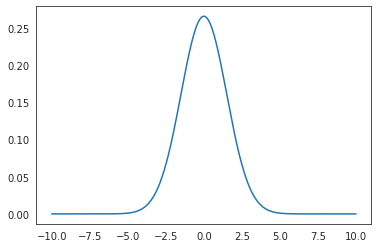

In [ ]:
#Return evenly spaced numbers over a specified interval.
x = np.linspace(start=-10, stop=10, num=1000)
#A normal continuous random variable.
#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
y = stats.norm.pdf(x, loc=0, scale=1.5) 
#plot it!
plt.plot(x, y)

In [ ]:
#for data preprocessing
import pandas as pd

In [ ]:
#read our dataset
df = pd.read_csv("bimodal_example.csv")
#show first 5 examples (in BTC)
df.head(n=5)

,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995


In [ ]:
#show the distribution of the data as a histogram
data = df.x

In [ ]:
data

0     0.252851
1    -1.034562
2     3.319558
3     4.552363
4    -0.775995
        ...   
95   -1.064411
96    3.704321
97    2.937206
98    1.100278
99    2.652242
Name: x, Length: 100, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


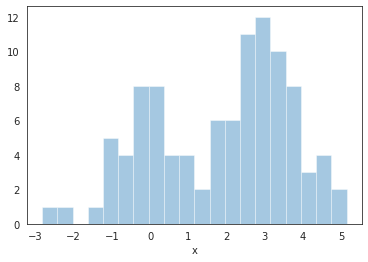

In [ ]:
#plot histogram
sns.distplot(data, bins=20, kde=False)

Is the normal distribution a useful model for the data?

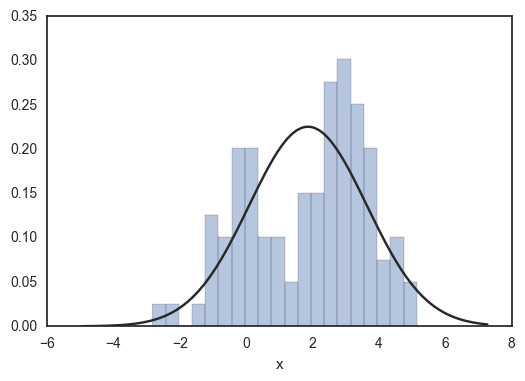

In [ ]:
#try to fit a normal distribution to this data
sns.distplot(data, fit=stats.norm, bins=20, kde=False,)

<br>
<br> 
<br>

----
Define The Model
-----

Two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. 

There are 5 paramaters: 4 of the them are Normal distributions and 1 more for the probability of choosing one of them.

Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.

The probability density function (PDF) is:

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  

Fit The Model
-----

Expectation–Maximization (EM) Algorithm  

What is Expectation–Maximization (EM) algorithm?
------

An iterative method for finding maximum likelihood (MLE) or maximum a posteriori (MAP) estimates of parameters in statistical models,when the model depends on unobserved latent variables

Alternates between performing:

- __Expectation (E)__ step: Given the current parameters of the model, estimate a probability distribution.

- __Maximization (M)__ step: Given the current data, estimate the parameters to update the model.

EM, more formally
-----

Alternates between performing:

- __Expectation (E)__ step: Using the current estimate for the parameters, create function for the expectation of the log-likelihood.  

- __Maximization (M)__ step: Computes parameters maximizing the expected log-likelihood found on the E step. 

The M parameter-estimates are then used to determine the distribution of the latent variables in the next E step.

EM is trying to maximize the following function:

- X is directly observed variable
- θ parameters of model
- Z is not directly observed / latent variable
    - Z is a joint (related) distribution on x.

EM Steps
-----

1. Initialize the parameters θ
2. Compute the best values for Z given θ  
3. Use the computed values of Z to compute a better estimate for the θ  
4. Iterate steps 2 and 3 until convergence

EM steps, stated another way
-----

1. Initialize the parameters of the models, either randomly or doing a "smart seeding"

2. E Step: Find the posterior probabilities of the latent variable given current parameter values.

3. M Step: Reestimate the parameter values given the current posterior probabilities.

4. Repeat 2-3 monitoring the likelihood function likelihood. Hope for convergence.

![alt text](http://i.imgur.com/0cTmOja.png "Logo Title Text 1")

![alt text](http://i.imgur.com/8kQ9aa6.png "Logo Title Text 1")

![alt text](http://i.imgur.com/A1j3lqB.png "Logo Title Text 1")

Back to our data
-----



In [ ]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    #printing model values
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [27]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 1.9, σ = 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


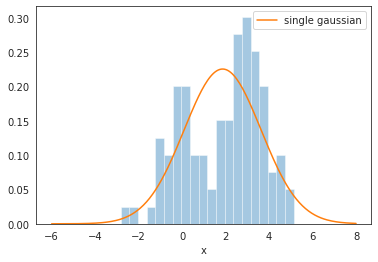

In [28]:
#fit a single gaussian curve to the data
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

In [29]:
from math import sqrt, log, exp, pi
from random import uniform

![alt text](http://i.imgur.com/kbD23Cv.jpg "Logo Title Text 1")


In [30]:
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        
        #as well as how much to mix them
        self.mix = mix
        self.loglike = 0

    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den
            # add into loglike
            self.loglike += log(wp1 + wp2)
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)
        # compute new means
        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(rigt, data))
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

    def iterate(self, N=1, verbose=False):
      
        "Perform N iterations, then compute log-likelihood"

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

In [31]:
# Check out the fitting process
n_iterations = 5
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass

In [32]:
# Find best Mixture Gaussian model
n_iterations = 20
n_random_restarts = 500
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture(data)
    for _ in range(n_iterations):
        try:
            mix.iterate(verbose  = True)
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
print('\n\nDone. 🙂')

Computing best model with random restarts...



Done. 🙂


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


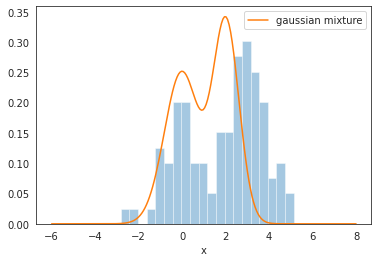

In [33]:
#mixture
sns.distplot(data, bins=20, kde=False, norm_hist=True)
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
plt.legend();

![alt text](http://www.astroml.org/_images/fig_GMM_1D_1.png "Logo Title Text 1")

Summary
----

- Gaussian Mixture Models (GMM) take our old friend the Gaussian and add another Gaussian(s).
- This allows us to model more complex data.
- We fit a GMM with the Expectation–Maximization (EM) Algorithm.
- Expectation–Maximization (EM) Algorithm is a series of steps to find good parameter estimates when there are latent variables.
- EM steps:
    1. Initialize the parameter estimates
    2. Given the current parameter estimates, find the min log likelihood for Z (data+latent variables)
    3. Given the current data, find better parameter estimates
    3. Repeat steps 2 & 3
- EM can be used beyond GMM
- GMM work well but you have to guess the number of Gaussians. Kernel Density Estimation (KDE) does __not__ require that kind of guessing 

<br>
<br> 
<br>

----